In [2]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 

In [112]:
dir(xt)

['ALLOCATED_MULTIPOLE_ORDER',
 'Action',
 'BeamElement',
 'BeamInteraction',
 'BeamPositionMonitor',
 'BeamPositionMonitorRecord',
 'BeamProfileMonitor',
 'BeamProfileMonitorRecord',
 'BeamSizeMonitor',
 'BeamSizeMonitorRecord',
 'Bend',
 'Cavity',
 'CombinedFunctionMagnet',
 'DipoleEdge',
 'DipoleFringe',
 'Drift',
 'DriftSlice',
 'DriftSliceBend',
 'DriftSliceOctupole',
 'DriftSliceQuadrupole',
 'DriftSliceSextupole',
 'ELECTRON_MASS_EV',
 'END',
 'Elens',
 'EnergyProgram',
 'Exciter',
 'FirstOrderTaylorMap',
 'Footprint',
 'FunctionPieceWiseLinear',
 'GreaterThan',
 'LastTurnsData',
 'LastTurnsMonitor',
 'LessThan',
 'LimitEllipse',
 'LimitPolygon',
 'LimitRacetrack',
 'LimitRect',
 'LimitRectEllipse',
 'Line',
 'LineSegmentMap',
 'LinearRescale',
 'LinearTransferMatrix',
 'List',
 'Log',
 'LongitudinalLimitRect',
 'LossLocationRefinement',
 'MadLoader',
 'Marker',
 'MultiSetter',
 'MultiTwiss',
 'Multiline',
 'Multipole',
 'Node',
 'NonLinearLens',
 'Number',
 'Octupole',
 'PROTON_

In [3]:
pi = np.pi
lbend = 3

# Build a simple ring
elements = [
    xt.Quadrupole(length=0.3, k1=0.1),
    xt.Drift(length=1),
    xt.Bend(length=lbend, k0=pi / (2 * lbend), h=pi / (2 * lbend)),
    xt.Drift(length=1),

    xt.Quadrupole(length=0.3, k1=-0.7),
    xt.Drift(length=1),
    xt.Bend(length=lbend, k0=pi / (2 * lbend), h=pi / (2 * lbend)),
    xt.Drift(length=1),

    xt.Quadrupole(length=0.3, k1=0.1),
    xt.Drift(length=1),
    xt.Bend(length=lbend, k0=pi / (2 * lbend), h=pi / (2 * lbend)),
    xt.Drift(length=1),

    xt.Quadrupole(length=0.3, k1=-0.7),
    xt.Drift(length=1),
    xt.Bend(length=lbend, k0=pi / (2 * lbend), h=pi / (2 * lbend)),
    xt.Drift(length=1),
]

# Define the names for the elements
element_names = [
    'mqf.1', 'd1.1', 'bend.1', 'd2.1',
    'mqd.1', 'd3.1', 'bend.2', 'd4.1',
    'mqf.2', 'd1.2', 'bend.3', 'd2.2',
    'mqd.2', 'd3.2', 'bend.4', 'd4.2',
]

line = xt.Line(elements=elements, element_names=element_names)


In [16]:
line.particle_ref = xt.Particles(p0c=3500e9, #eV
                                 q0=-1, mass0=xt.PROTON_MASS_EV)

In [32]:
table= line.to_pandas()
table # is Quadrupole(length=0.3, k1=0.1, ...)



,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.0,Quadrupole,mqf.1,True,False,None,False,"Quadrupole(k1=0.1, k1s=0, length=0.3, num_mult..."
1,0.3,Drift,d1.1,True,False,None,False,Drift(length=1)
2,1.3,Bend,bend.1,True,False,None,False,"Bend(length=3, k0=0.524, k1=0, h=0.524, model=..."
3,4.3,Drift,d2.1,True,False,None,False,Drift(length=1)
4,5.3,Quadrupole,mqd.1,True,False,None,False,"Quadrupole(k1=-0.7, k1s=0, length=0.3, num_mul..."
5,5.6,Drift,d3.1,True,False,None,False,Drift(length=1)
6,6.6,Bend,bend.2,True,False,None,False,"Bend(length=3, k0=0.524, k1=0, h=0.524, model=..."
7,9.6,Drift,d4.1,True,False,None,False,Drift(length=1)
8,10.6,Quadrupole,mqf.2,True,False,None,False,"Quadrupole(k1=0.1, k1s=0, length=0.3, num_mult..."
9,10.9,Drift,d1.2,True,False,None,False,Drift(length=1)


In [44]:
tab=line.get_table()
tab.rows[3.0:7.0:'s']

Table: 4 rows, 7 cols
name               s element_type isthick isreplica parent_name iscollective
d2.1             4.3 Drift           True     False None               False
mqd.1            5.3 Quadrupole      True     False None               False
d3.1             5.6 Drift           True     False None               False
bend.2           6.6 Bend            True     False None               False

In [49]:
line.vars.get_table()

Table: 1 row, 2 cols
name             value
t_turn_s             0

AttributeError: 'Line' object has no attribute 'new'

In [5]:
context = xo.ContextCpu()
line.build_tracker(_context=context)
tw = line.twiss(method='4d')
tw.cols['betx  bety']






TwissTable: 17 rows, 3 cols
name                betx          bety
mqf.1            1.27738       4.79104
d1.1             1.27738       4.79104
bend.1           2.26749       5.20838
d2.1             2.88391       8.99176
mqd.1            1.72481       11.0967
d3.1             1.72481       11.0967
bend.2           2.88391       8.99176
d4.1             2.26749       5.20838
mqf.2            1.27738       4.79104
d1.2             1.27738       4.79104
bend.3           2.26749       5.20838
d2.2             2.88391       8.99176
mqd.2            1.72481       11.0967
d3.2             1.72481       11.0967
bend.4           2.88391       8.99176
d4.2             2.26749       5.20838
_end_point       1.27738       4.79104

In [6]:
N_particles=1000
Trev = 5e-7    # 500ns
Nf = 10 
a_un = -(Trev / 2) * (1 / Nf) #The limits of my taus' uniform distribution
b_un = (Trev / 2) * (1 / Nf)
x = np.random.normal(0,1e-6,N_particles)
px = np.random.normal(0,1e-7,N_particles)
y = np.random.normal(0,1e-6,N_particles)
py = np.random.normal(0,1e-7,N_particles)
delta = np.random.normal(0, 0.0000001, N_particles)
tau = np.random.uniform(a_un, b_un, N_particles)
particles=line.build_particles(x = x,
                               px = px,
                               y = y,
                               py = py,
                               delta = delta,
tau = tau)

In [11]:
n_turns = 2
line.track(particles, num_turns=n_turns, turn_by_turn_monitor=True)
x_positions= particles.x
px_positions= particles.px
deltas = particles.delta
last_tau = particles.zeta
print(x_positions.shape)

(1000,)


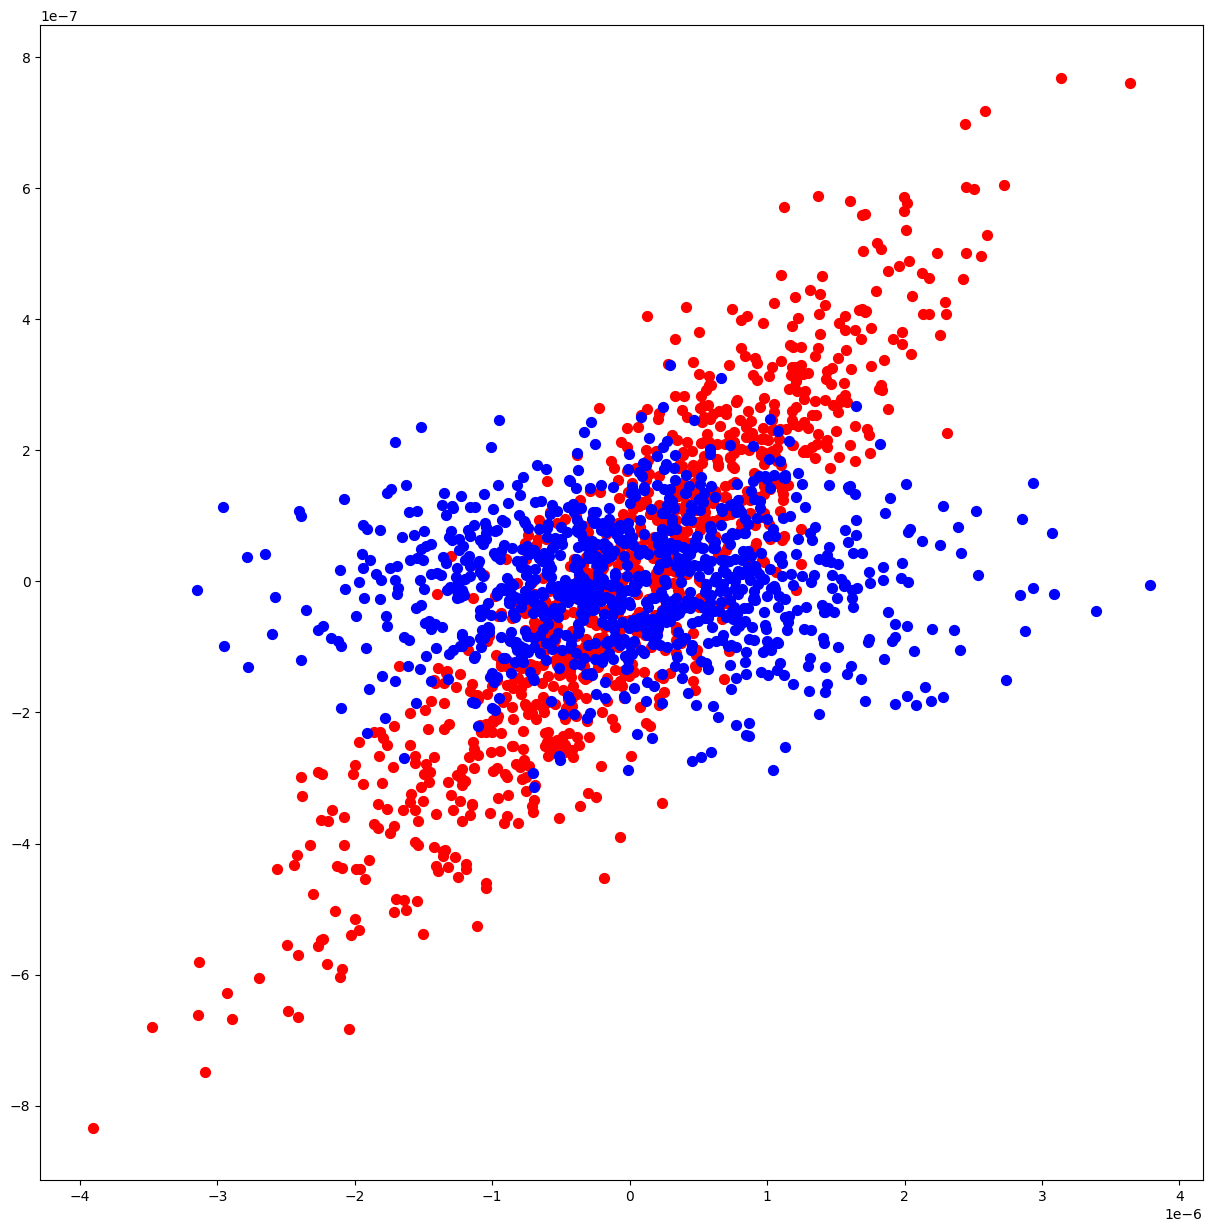

In [12]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 15))

ax1.scatter(x_positions, px_positions, color='red', s=50, label='First Element')
ax1.scatter(x, px, color='blue', s=50, label='First Element')




In [75]:
px_positions

array([-1.31090070e-07, -1.42466756e-07, -5.91766843e-08,  5.40516210e-08,
       -6.93154449e-08,  8.09250218e-08, -9.80540613e-08, -1.40780708e-07,
        3.45764979e-07, -2.79198549e-07,  9.60835100e-08,  1.87752562e-07,
        7.02818569e-08,  1.72415988e-07,  2.35461897e-07,  8.80040655e-08,
       -2.66285807e-07,  1.53782945e-07,  2.68699700e-07, -2.68685783e-07,
        2.63872440e-07, -7.15704416e-08,  2.45235041e-07, -4.76450700e-08,
        1.76641919e-07, -9.85137242e-08, -7.96407702e-08,  4.79813125e-07,
        2.12743241e-07,  1.64421981e-07,  1.12720118e-08,  8.39404824e-08,
        3.43703804e-07, -1.45792482e-07, -2.43659801e-09, -3.22816478e-08,
        2.40081940e-07,  1.14711031e-07, -1.77529467e-07,  3.81555462e-07,
       -5.57455939e-08, -6.33637344e-09, -1.98702258e-07,  1.48945870e-07,
       -2.53970157e-07, -1.51080002e-07,  3.66655686e-07,  2.15425200e-07,
       -1.30066263e-07,  1.50380188e-07,  2.04529778e-07,  8.88554584e-08,
       -1.89924947e-07, -